In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pickle

In [165]:
supplies = pd.read_csv('Supplies4.csv', parse_dates=[0], index_col=[0])

In [166]:
supplies.head()

,supplies
date,
2009-07-20,2016
2009-07-21,2153
2009-07-22,4211
2009-07-23,2448
2009-07-24,3216


In [167]:
f_supplies = supplies.iloc[:, [0]]

In [168]:
f_supplies.head()

,supplies
date,
2009-07-20,2016
2009-07-21,2153
2009-07-22,4211
2009-07-23,2448
2009-07-24,3216


In [169]:
type(f_supplies)

pandas.core.frame.DataFrame

In [170]:
series_value = f_supplies.values

In [171]:
type(series_value)

numpy.ndarray

In [172]:
f_supplies.size

3999

In [173]:
f_supplies.tail()

,supplies
date,
2020-06-26,3064
2020-06-27,4511
2020-06-28,2756
2020-06-29,4032
2020-06-30,2251


In [174]:
f_supplies.describe()

,supplies
count,3999.000000
mean,2985.755939
std,844.878364
min,2000.000000
25%,2200.000000
50%,2768.000000
75%,3750.000000
max,4883.000000


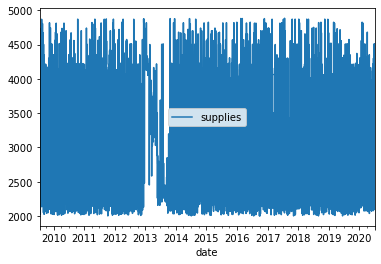

In [175]:
f_supplies.plot()

In [176]:
f_supplies_mean = f_supplies.rolling(window = 50).mean()

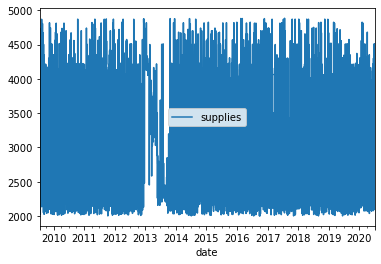

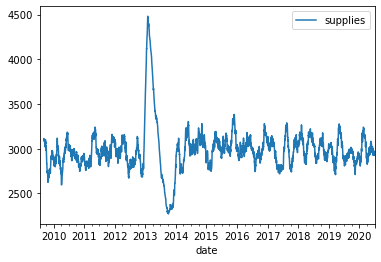

In [177]:
f_supplies.plot()
f_supplies_mean.plot()

In [178]:
value = pd.DataFrame(series_value)

In [179]:
supplies_df = pd.concat([value, value.shift(1)], axis=1)

In [180]:
supplies_df.head()

,0,0
0,2016,NaN
1,2153,2016.0
2,4211,2153.0
3,2448,4211.0
4,3216,2448.0


In [181]:
supplies_df.columns = ['Actual_usage', 'Forecast_usage']

In [182]:
supplies_df.head()

,Actual_usage,Forecast_usage
0,2016,NaN
1,2153,2016.0
2,4211,2153.0
3,2448,4211.0
4,3216,2448.0


In [183]:
supplies_test = supplies_df[1:]

In [184]:
supplies_test.head()

,Actual_usage,Forecast_usage
1,2153,2016.0
2,4211,2153.0
3,2448,4211.0
4,3216,2448.0
5,2210,3216.0


In [185]:
supplies_error = mean_squared_error(supplies_test.Actual_usage, supplies_test.Forecast_usage)

In [186]:
supplies_error

1271692.416458229

In [187]:
np.sqrt(supplies_error)

1127.6934053448344

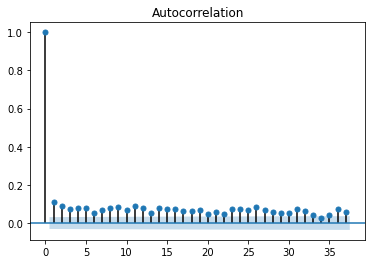

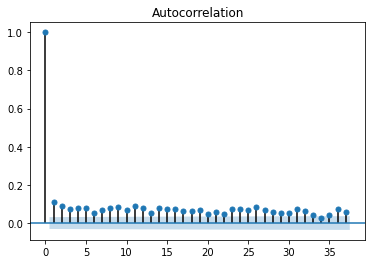

In [188]:
# plot_acf is to identify parameter Q
# ARIMA(p, d, q)

plot_acf(f_supplies)

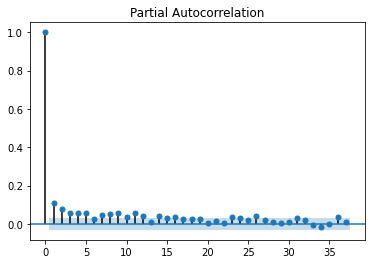

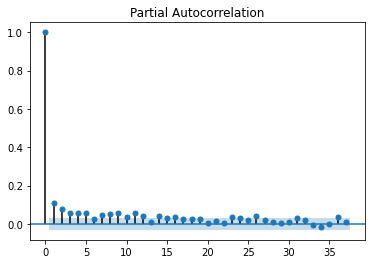

In [189]:
# to identify the value of p

plot_pacf(f_supplies)

In [190]:
f_supplies.size

3999

In [221]:
supplies_train, supplies_test = np.split(f_supplies, [int(.75*len(f_supplies))])

In [225]:
supplies_train.size

2999

In [226]:
# p=2,3 d=0 q=3,4


In [192]:
supplies_test.size

999

In [193]:
supplies_model = ARIMA(supplies_train, order=(3, 0, 3))

C:\Users\Piyumal\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [194]:
supplies_model_fit = supplies_model.fit()

In [195]:
supplies_model_fit.aic

48795.469851449016

In [196]:
supplies_forecast = supplies_model_fit.forecast(steps = 999)[0]

In [197]:
supplies_forecast

array([2851.68571984, 2880.67288888, 2859.25557891, 2885.36092418,
       2863.97747012, 2888.64056462, 2867.93305745, 2891.52446898,
       2871.61752045, 2894.2538516 , 2875.15082099, 2896.8874717 ,
       2878.56410821, 2899.44090015, 2881.86744154, 2901.91945   ,
       2885.0658066 , 2904.32596408, 2888.16290501, 2906.66265752,
       2891.16205327, 2908.93155453, 2894.06639793, 2911.13459282,
       2896.87896904, 2913.27364935, 2899.60269537, 2915.35054751,
       2902.24041032, 2917.3670598 , 2904.79485571, 2919.32490951,
       2907.26868494, 2921.22577212, 2909.66446585, 2923.07127655,
       2911.98468361, 2924.86300639, 2914.23174335, 2926.60250116,
       2916.4079728 , 2928.29125745, 2918.51562482, 2929.93073005,
       2920.55687982, 2931.52233313, 2922.53384814, 2933.06744126,
       2924.4485723 , 2934.56739053, 2926.30302926, 2936.02347955,
       2928.0991325 , 2937.4369705 , 2929.8387341 , 2938.80909007,
       2931.52362675, 2940.14103044, 2933.15554566, 2941.43395

In [198]:
supplies_test

,supplies
date,
2017-10-06,2216
2017-10-07,2529
2017-10-08,2478
2017-10-09,2560
2017-10-10,3805
...,...
2020-06-26,3064
2020-06-27,4511
2020-06-28,2756


In [199]:
np.sqrt(mean_squared_error(supplies_test, supplies_forecast))

821.0493261699487

In [42]:
# saving model to disk

#pickle.dump([supplies_model_fit, supplies_forecast], open('model.pkl', 'wb'))

with open('model.pickle', 'wb') as f:
    pickle.dump([supplies_test, supplies_forecast, supplies_model_fit], f)

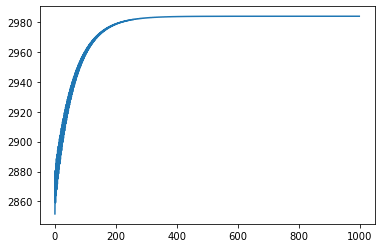

In [200]:
plt.plot(supplies_forecast)

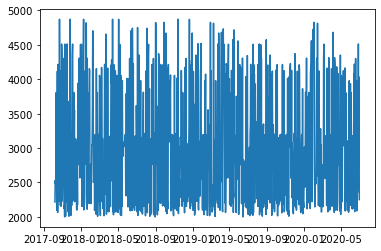

In [201]:
plt.plot(supplies_test)